In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df_path = "./AABA_2006-01-01_to_2018-01-01.csv"
look_back = 60

In [3]:
df = pd.read_csv(df_path)

In [4]:
df.head

<bound method NDFrame.head of             Date   Open   High    Low  Close    Volume  Name
0     2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
1     2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2     2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
3     2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
4     2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA
...          ...    ...    ...    ...    ...       ...   ...
3014  2017-12-22  71.42  71.87  71.22  71.58  10979165  AABA
3015  2017-12-26  70.94  71.39  69.63  69.86   8542802  AABA
3016  2017-12-27  69.77  70.49  69.69  70.06   6345124  AABA
3017  2017-12-28  70.12  70.32  69.51  69.82   7556877  AABA
3018  2017-12-29  69.79  70.13  69.43  69.85   6613070  AABA

[3019 rows x 7 columns]>

In [5]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [6]:
def normalizer(df):
    min_h = np.min(df['High'])
    max_h = np.max(df['High'])

    df['High'] = (df['High']-min_h) / (max_h - min_h)
    return df

In [7]:
df = df[['Date','High']]
df['year'] = df['Date'].apply(lambda x : int(x[0:4]))
df = df.sort_values(by=['Date'])
train_data = df[df['year'] < 2017]
test_data  = df[df['year'] >= 2017]

C:\Users\POORYA\AppData\Local\Temp\ipykernel_4224\3968938223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Date'].apply(lambda x : int(x[0:4]))


In [8]:
train_data = normalizer(train_data)
test_data = normalizer(test_data)

C:\Users\POORYA\AppData\Local\Temp\ipykernel_4224\1465759155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'] = (df['High']-min_h) / (max_h - min_h)


In [9]:
train_data = np.array(train_data['High'])
test_data  = np.array(test_data['High'])

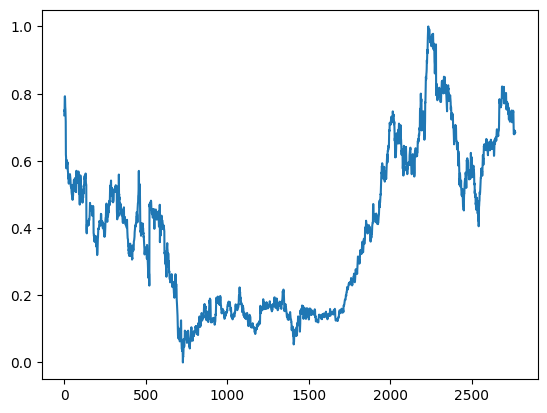

In [10]:
plt.plot(train_data)

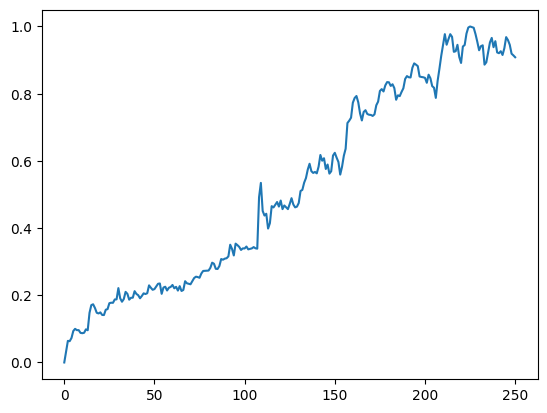

In [11]:
plt.plot(test_data)

In [12]:
def create_sequence(data,seq_length):
    x = []
    y = []
    for i in range(seq_length,data.shape[0]):
        x.append(np.array(data[i-seq_length:i]).reshape((1,look_back)))
        y.append(np.array(data[i]))
    return np.array(x),np.array(y)


In [13]:
def make_plot(y,y_hat):
    plt.clf()
    x = np.linspace(0,y.shape[0],y.shape[0])
    plt.plot(x,y,'g',label="Output")
    plt.plot(x,y_hat,'r',label="predicted")
    plt.legend()

In [14]:
def loss_plot(y):
    plt.clf()
    x = np.linspace(0,y.shape[0],y.shape[0])
    plt.plot(x,y,'black',label="Loss")
    plt.legend()

In [15]:
x_train , y_train = create_sequence(train_data,look_back)
x_test , y_test   = create_sequence(test_data,look_back)

In [16]:
y_train_plot = y_train.reshape((y_train.shape[0],1))
y_test_plot = y_test.reshape((y_test.shape[0],1))

In [113]:
opt = SGD(learning_rate = 0.01 , momentum = 0.9)

In [161]:
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=opt)
res = model.fit(x_train, y_train, epochs=200, batch_size=8, verbose=2 , validation_data=(x_test,y_test))

Epoch 1/200
339/339 - 3s - loss: 0.0230 - val_loss: 0.0142 - 3s/epoch - 9ms/step
Epoch 2/200
339/339 - 1s - loss: 0.0017 - val_loss: 0.0073 - 694ms/epoch - 2ms/step
Epoch 3/200
339/339 - 1s - loss: 0.0015 - val_loss: 0.0054 - 663ms/epoch - 2ms/step
Epoch 4/200
339/339 - 1s - loss: 0.0014 - val_loss: 0.0036 - 637ms/epoch - 2ms/step
Epoch 5/200
339/339 - 1s - loss: 0.0013 - val_loss: 0.0044 - 636ms/epoch - 2ms/step
Epoch 6/200
339/339 - 1s - loss: 0.0012 - val_loss: 0.0041 - 708ms/epoch - 2ms/step
Epoch 7/200
339/339 - 1s - loss: 0.0012 - val_loss: 0.0045 - 698ms/epoch - 2ms/step
Epoch 8/200
339/339 - 1s - loss: 0.0011 - val_loss: 0.0037 - 670ms/epoch - 2ms/step
Epoch 9/200
339/339 - 1s - loss: 0.0011 - val_loss: 0.0055 - 707ms/epoch - 2ms/step
Epoch 10/200
339/339 - 1s - loss: 0.0011 - val_loss: 0.0049 - 902ms/epoch - 3ms/step
Epoch 11/200
339/339 - 1s - loss: 0.0010 - val_loss: 0.0034 - 965ms/epoch - 3ms/step
Epoch 12/200
339/339 - 1s - loss: 0.0010 - val_loss: 0.0028 - 876ms/epoch - 3

In [163]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
testScore = mean_squared_error(y_test, testPredict)
print('Test Score: %f MSE' % (testScore))

6/6 [==============================] - 0s 1ms/step
Test Score: 0.000728 MSE


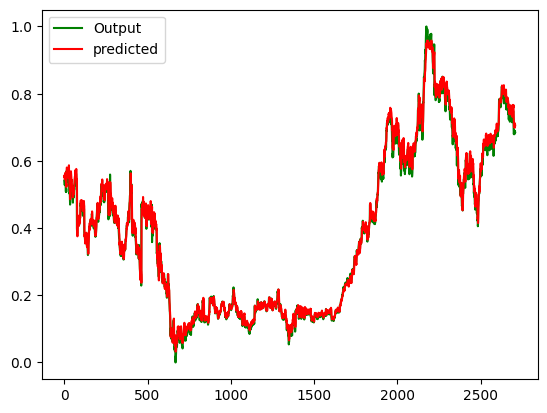

In [167]:
make_plot(y_train_plot,trainPredict)

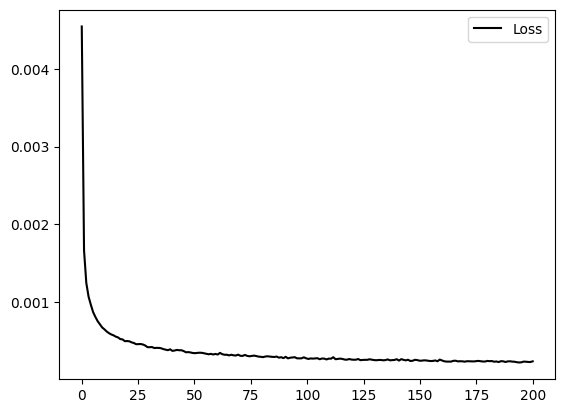

In [168]:
loss_plot(np.array(res.history['loss']))

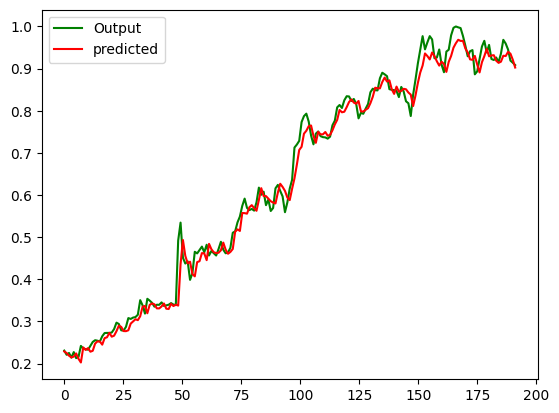

In [169]:
make_plot(y_test_plot,testPredict)

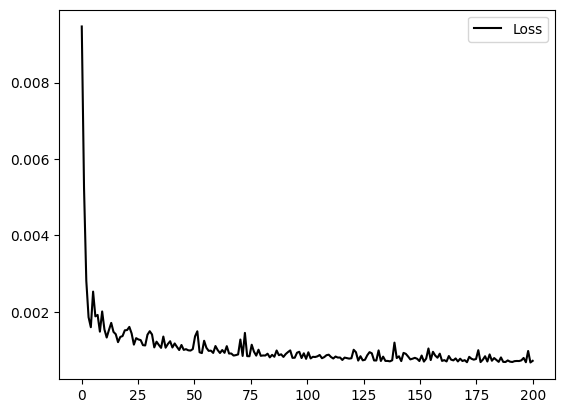

In [170]:
loss_plot(np.array(res.history['val_loss']))

Change Number of Units

In [165]:
opt = SGD(learning_rate = 0.01 , momentum= 0.9)

In [166]:
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=opt)
res = model.fit(x_train, y_train, epochs=200, batch_size=8, verbose=2 , validation_data=(x_test,y_test))

Epoch 1/200
339/339 - 3s - loss: 0.0045 - val_loss: 0.0095 - 3s/epoch - 8ms/step
Epoch 2/200
339/339 - 1s - loss: 0.0017 - val_loss: 0.0052 - 759ms/epoch - 2ms/step
Epoch 3/200
339/339 - 1s - loss: 0.0012 - val_loss: 0.0028 - 630ms/epoch - 2ms/step
Epoch 4/200
339/339 - 1s - loss: 0.0011 - val_loss: 0.0019 - 683ms/epoch - 2ms/step
Epoch 5/200
339/339 - 1s - loss: 9.6540e-04 - val_loss: 0.0016 - 749ms/epoch - 2ms/step
Epoch 6/200
339/339 - 1s - loss: 8.7103e-04 - val_loss: 0.0025 - 795ms/epoch - 2ms/step
Epoch 7/200
339/339 - 1s - loss: 8.0868e-04 - val_loss: 0.0019 - 575ms/epoch - 2ms/step
Epoch 8/200
339/339 - 1s - loss: 7.5426e-04 - val_loss: 0.0019 - 609ms/epoch - 2ms/step
Epoch 9/200
339/339 - 1s - loss: 7.1338e-04 - val_loss: 0.0015 - 605ms/epoch - 2ms/step
Epoch 10/200
339/339 - 1s - loss: 6.7303e-04 - val_loss: 0.0020 - 631ms/epoch - 2ms/step
Epoch 11/200
339/339 - 1s - loss: 6.4889e-04 - val_loss: 0.0015 - 594ms/epoch - 2ms/step
Epoch 12/200
339/339 - 1s - loss: 6.2072e-04 - va

In [162]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
testScore = mean_squared_error(y_test, testPredict)
print('Test Score: %f MSE' % (testScore))

6/6 [==============================] - 0s 1ms/step
Test Score: 0.000728 MSE


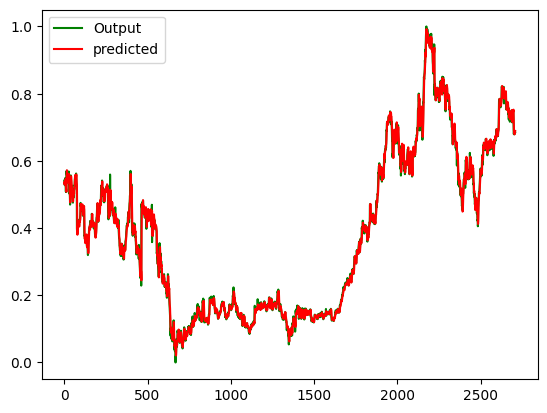

In [127]:
make_plot(y_train_plot,trainPredict)

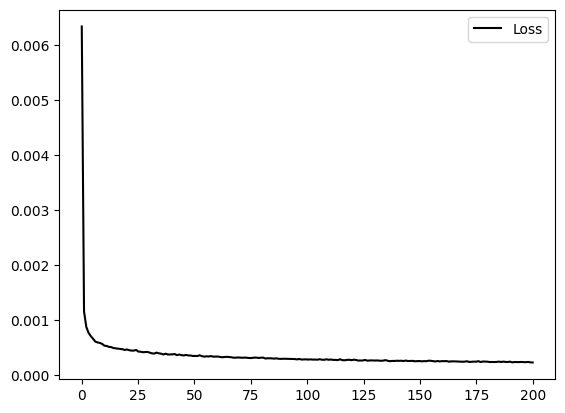

In [128]:
loss_plot(np.array(res.history['loss']))

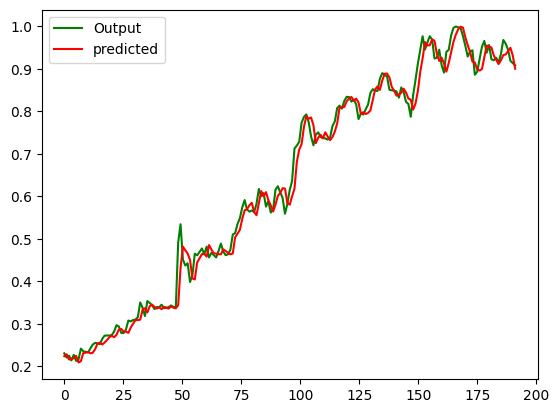

In [129]:
make_plot(y_test_plot,testPredict)

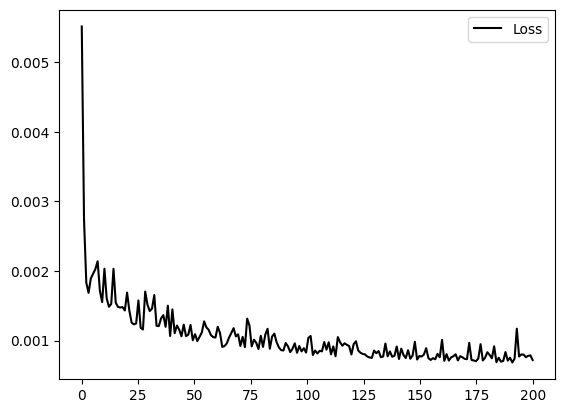

In [130]:
loss_plot(np.array(res.history['val_loss']))

Change Number of Layers

In [144]:
opt = SGD(learning_rate=0.01 , momentum=0.9)

In [145]:
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back),return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=opt)
res = model.fit(x_train, y_train, epochs=200, batch_size=8, verbose=2 , validation_data=(x_test,y_test))

Epoch 1/200
339/339 - 4s - loss: 0.0368 - val_loss: 0.0299 - 4s/epoch - 13ms/step
Epoch 2/200
339/339 - 1s - loss: 0.0036 - val_loss: 0.0120 - 802ms/epoch - 2ms/step
Epoch 3/200
339/339 - 1s - loss: 0.0024 - val_loss: 0.0094 - 813ms/epoch - 2ms/step
Epoch 4/200
339/339 - 1s - loss: 0.0018 - val_loss: 0.0064 - 813ms/epoch - 2ms/step
Epoch 5/200
339/339 - 1s - loss: 0.0014 - val_loss: 0.0055 - 809ms/epoch - 2ms/step
Epoch 6/200
339/339 - 1s - loss: 0.0011 - val_loss: 0.0047 - 831ms/epoch - 2ms/step
Epoch 7/200
339/339 - 1s - loss: 9.9573e-04 - val_loss: 0.0025 - 814ms/epoch - 2ms/step
Epoch 8/200
339/339 - 1s - loss: 9.1026e-04 - val_loss: 0.0023 - 1s/epoch - 3ms/step
Epoch 9/200
339/339 - 1s - loss: 8.4729e-04 - val_loss: 0.0022 - 1s/epoch - 3ms/step
Epoch 10/200
339/339 - 1s - loss: 8.1265e-04 - val_loss: 0.0019 - 1s/epoch - 3ms/step
Epoch 11/200
339/339 - 1s - loss: 7.8744e-04 - val_loss: 0.0027 - 1s/epoch - 4ms/step
Epoch 12/200
339/339 - 1s - loss: 7.5171e-04 - val_loss: 0.0022 - 1s

In [146]:
trainPredict = model.predict(x_train).reshape((trainPredict.shape[0],trainPredict.shape[1]))
testPredict = model.predict(x_test).reshape((testPredict.shape[0],testPredict.shape[1]))
testScore = mean_squared_error(y_test, testPredict)
print('Test Score: %f MSE' % (testScore))

6/6 [==============================] - 0s 1ms/step
Test Score: 0.000813 MSE


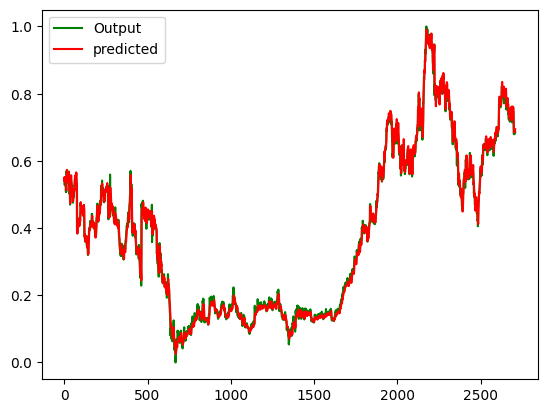

In [147]:
make_plot(y_train_plot,trainPredict)

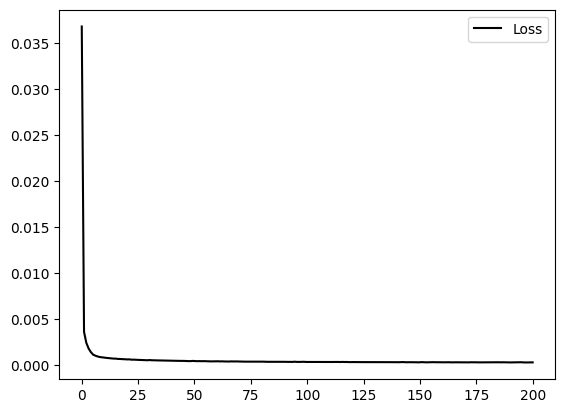

In [148]:
loss_plot(np.array(res.history['loss']))

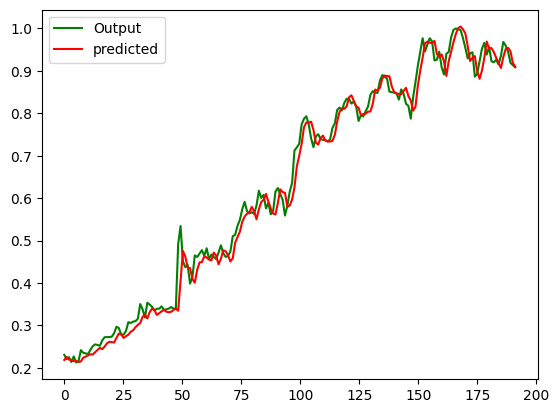

In [149]:
make_plot(y_test_plot,testPredict)

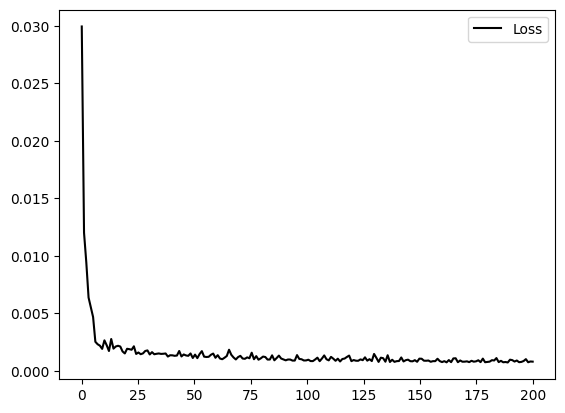

In [151]:
loss_plot(np.array(res.history['val_loss']))

Change Batch Size

In [152]:
opt = SGD(learning_rate = 0.01 , momentum = 0.9)

In [153]:
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
res = model.fit(x_train, y_train, epochs=200, batch_size=64, verbose=2 , validation_data=(x_test,y_test))

Epoch 1/200
43/43 - 2s - loss: 0.0214 - val_loss: 0.0279 - 2s/epoch - 51ms/step
Epoch 2/200
43/43 - 0s - loss: 0.0032 - val_loss: 0.0132 - 154ms/epoch - 4ms/step
Epoch 3/200
43/43 - 0s - loss: 0.0023 - val_loss: 0.0106 - 89ms/epoch - 2ms/step
Epoch 4/200
43/43 - 0s - loss: 0.0020 - val_loss: 0.0086 - 94ms/epoch - 2ms/step
Epoch 5/200
43/43 - 0s - loss: 0.0016 - val_loss: 0.0059 - 98ms/epoch - 2ms/step
Epoch 6/200
43/43 - 0s - loss: 0.0013 - val_loss: 0.0038 - 97ms/epoch - 2ms/step
Epoch 7/200
43/43 - 0s - loss: 0.0011 - val_loss: 0.0037 - 102ms/epoch - 2ms/step
Epoch 8/200
43/43 - 0s - loss: 9.4482e-04 - val_loss: 0.0024 - 101ms/epoch - 2ms/step
Epoch 9/200
43/43 - 0s - loss: 8.5165e-04 - val_loss: 0.0021 - 105ms/epoch - 2ms/step
Epoch 10/200
43/43 - 0s - loss: 8.0603e-04 - val_loss: 0.0020 - 103ms/epoch - 2ms/step
Epoch 11/200
43/43 - 0s - loss: 7.3658e-04 - val_loss: 0.0022 - 99ms/epoch - 2ms/step
Epoch 12/200
43/43 - 0s - loss: 6.9233e-04 - val_loss: 0.0023 - 106ms/epoch - 2ms/step


In [154]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
testScore = mean_squared_error(y_test, testPredict)
print('Test Score: %f MSE' % (testScore))

6/6 [==============================] - 0s 2ms/step
Test Score: 0.000668 MSE


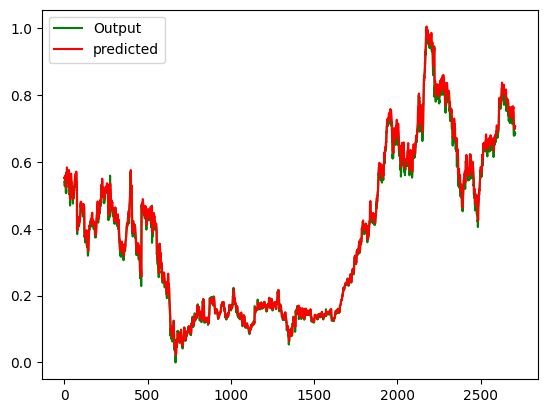

In [155]:
make_plot(y_train_plot,trainPredict)

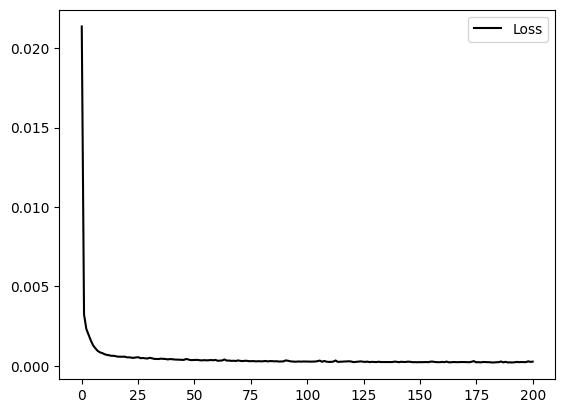

In [156]:
loss_plot(np.array(res.history['loss']))

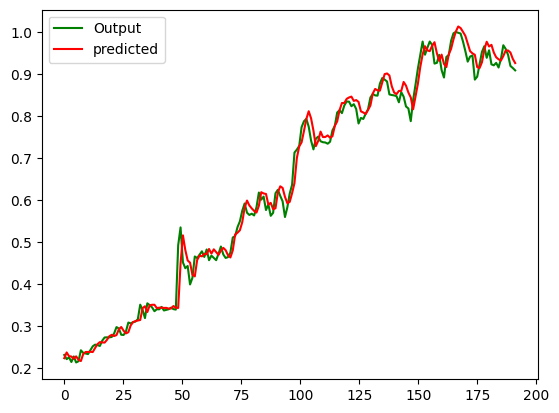

In [157]:
make_plot(y_test_plot,testPredict)

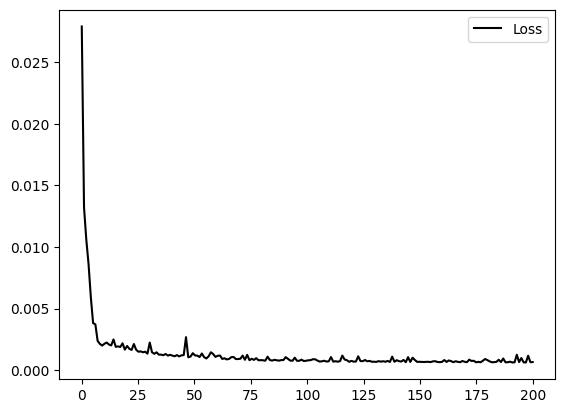

In [158]:
loss_plot(np.array(res.history['val_loss']))